In [674]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as grspec
import seaborn as sns
from scipy import stats
import numpy as np
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

In this notebook I will try to predict the price of the housebuilding by parameters. Good luck! 
We have 80 parameters and the price in the dataset of 1460 houses.

In [675]:
df = pd.read_csv('train.csv')
display(df.describe())
df.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


First we need to drop Id. Also check which columns have null values. Here we can see that features like PoolQC, Alley, Fence and MiscFeature are almost all silled by null, so drop it.

[('LotFrontage', 259), ('Alley', 1369), ('MasVnrType', 8), ('MasVnrArea', 8), ('BsmtQual', 37), ('BsmtCond', 37), ('BsmtExposure', 38), ('BsmtFinType1', 37), ('BsmtFinType2', 38), ('Electrical', 1), ('FireplaceQu', 690), ('GarageType', 81), ('GarageYrBlt', 81), ('GarageFinish', 81), ('GarageQual', 81), ('GarageCond', 81), ('PoolQC', 1453), ('Fence', 1179), ('MiscFeature', 1406)]


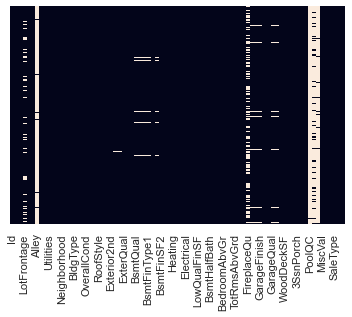

In [676]:
g = df.isnull().sum()
print([(t, g[t]) for t in g.keys() if g[t] > 0])
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.show()

Lets check correlation of the parameters with the house price. See that Overall Qual, GrLivArea, GarageCars+Area are the most significant

In [677]:
(df.corr()**2)['SalePrice'].sort_values(ascending=False)[:20]

SalePrice       1.000000
OverallQual     0.625652
GrLivArea       0.502149
GarageCars      0.410124
GarageArea      0.388667
TotalBsmtSF     0.376481
1stFlrSF        0.367057
FullBath        0.314344
TotRmsAbvGrd    0.284860
YearBuilt       0.273422
YearRemodAdd    0.257151
GarageYrBlt     0.236548
MasVnrArea      0.228000
Fireplaces      0.218023
BsmtFinSF1      0.149320
LotFrontage     0.123763
WoodDeckSF      0.105244
2ndFlrSF        0.101974
OpenPorchSF     0.099765
HalfBath        0.080717
Name: SalePrice, dtype: float64

fig = plt.figure()

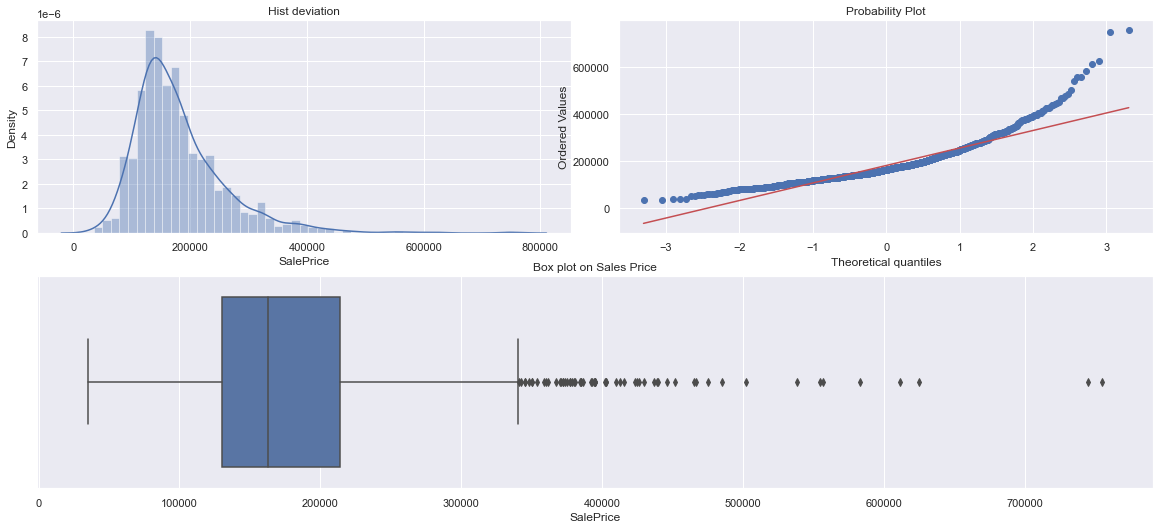

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In [678]:
fig = plt.figure(figsize=(20, 18))
gs = grspec.GridSpec(ncols=4, nrows=4, figure=fig)
ax1 = fig.add_subplot(gs[0, :2])
sns.distplot(df["SalePrice"], norm_hist=True, ax=ax1)
ax1.set_title("Hist deviation")
ax2 = fig.add_subplot(gs[0, 2:])
stats.probplot(df["SalePrice"], plot=ax2)
ax3 = fig.add_subplot(gs[1, :4])
ax3.set_title("Box plot on Sales Price")
sns.boxplot(df.loc[:,"SalePrice"], orient='v', ax=ax3)
plt.show()
print(f'Skewness: {df["SalePrice"].skew()}')
print(f'Kurtosis: {df["SalePrice"].kurt()}')

Lets analyse correlations. Obviously, there is linear correlation between price and live area

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 864x432 with 0 Axes>

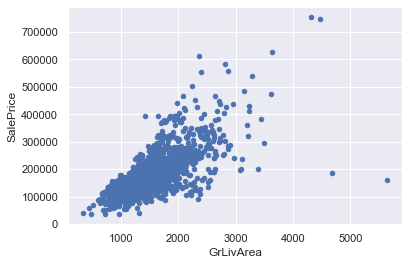

In [679]:
fig = plt.figure(figsize=(12, 6))
data = pd.concat([df["SalePrice"], df["GrLivArea"]], axis=1)
data.plot.scatter(x="GrLivArea", y="SalePrice")
plt.show()

Lets see on categorized features. We see squared dependency 

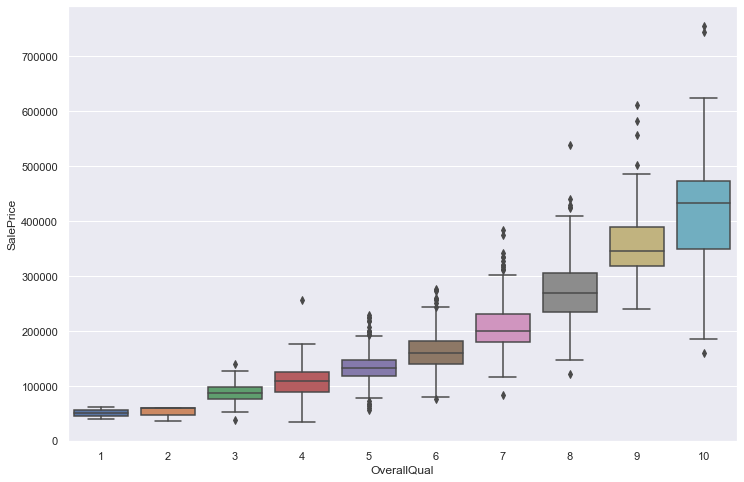

In [680]:
plt.figure(figsize=(12, 8))
data = pd.concat([df["SalePrice"], df["OverallQual"]], axis=1)
sns.boxplot(x = df["OverallQual"], y = df["SalePrice"])
plt.show()

Lets construct heatmap to check correlation between features. We see high level between 1 floor SF and Total BSMT SF.

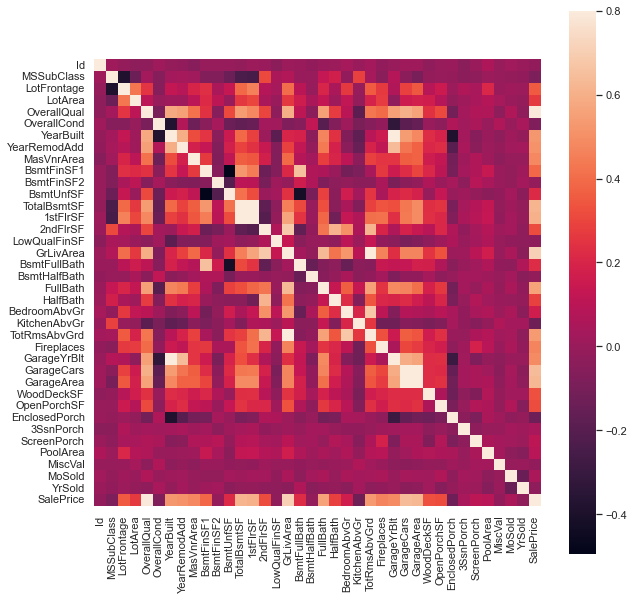

In [681]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), vmax=.8, square=True)
plt.show()

We see that almost every time the area of the basement is equal to first floor

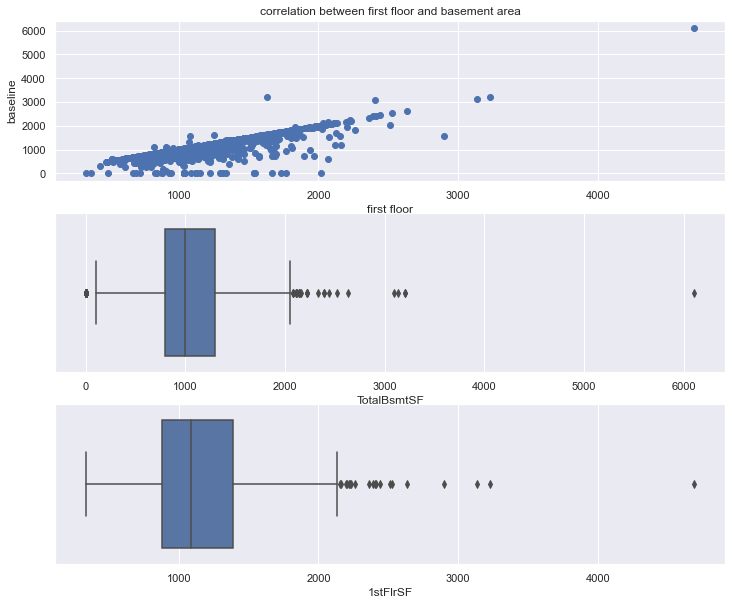

In [682]:
fg = plt.figure(figsize=(12, 10))
gs = grspec.GridSpec(ncols=1, nrows=3, figure=fg)
ax1 = fg.add_subplot(gs[0, :2])
data = pd.concat([df["1stFlrSF"], df["TotalBsmtSF"]], axis=1)
ax1.scatter(x=df["1stFlrSF"], y=df["TotalBsmtSF"])
ax1.set_xlabel("first floor")
ax1.set_ylabel("baseline")
ax1.set_title("correlation between first floor and basement area")
ax2 = fg.add_subplot(gs[1, :2])
t = sns.boxplot(df["TotalBsmtSF"], ax=ax2)
ax3 = fg.add_subplot(gs[2, :2])
t = sns.boxplot(df["1stFlrSF"], ax=ax3)
plt.show()


Write down parameters with highest impact: OverallQuality (no doubts), GrLivArea, GarageArea, Basement, 1stfloor, fullbath, total rooms and year of building. Also let check some intrasting dependencies: garage area and cars, 1stfloor and basement, living area and rooms, bath and living area, garage area and quality, year and quality, garage cars and year.

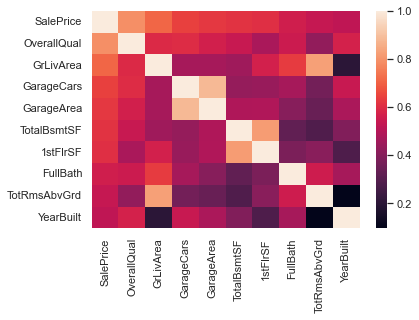

In [683]:
corrm = df.corr()
corrt = corrm.nlargest(10, 'SalePrice')['SalePrice'].index
corrj = np.corrcoef(df[corrt].values.T)
sns.heatmap(corrj, xticklabels=corrt.values, yticklabels=corrt.values)
plt.show()
sns.set()

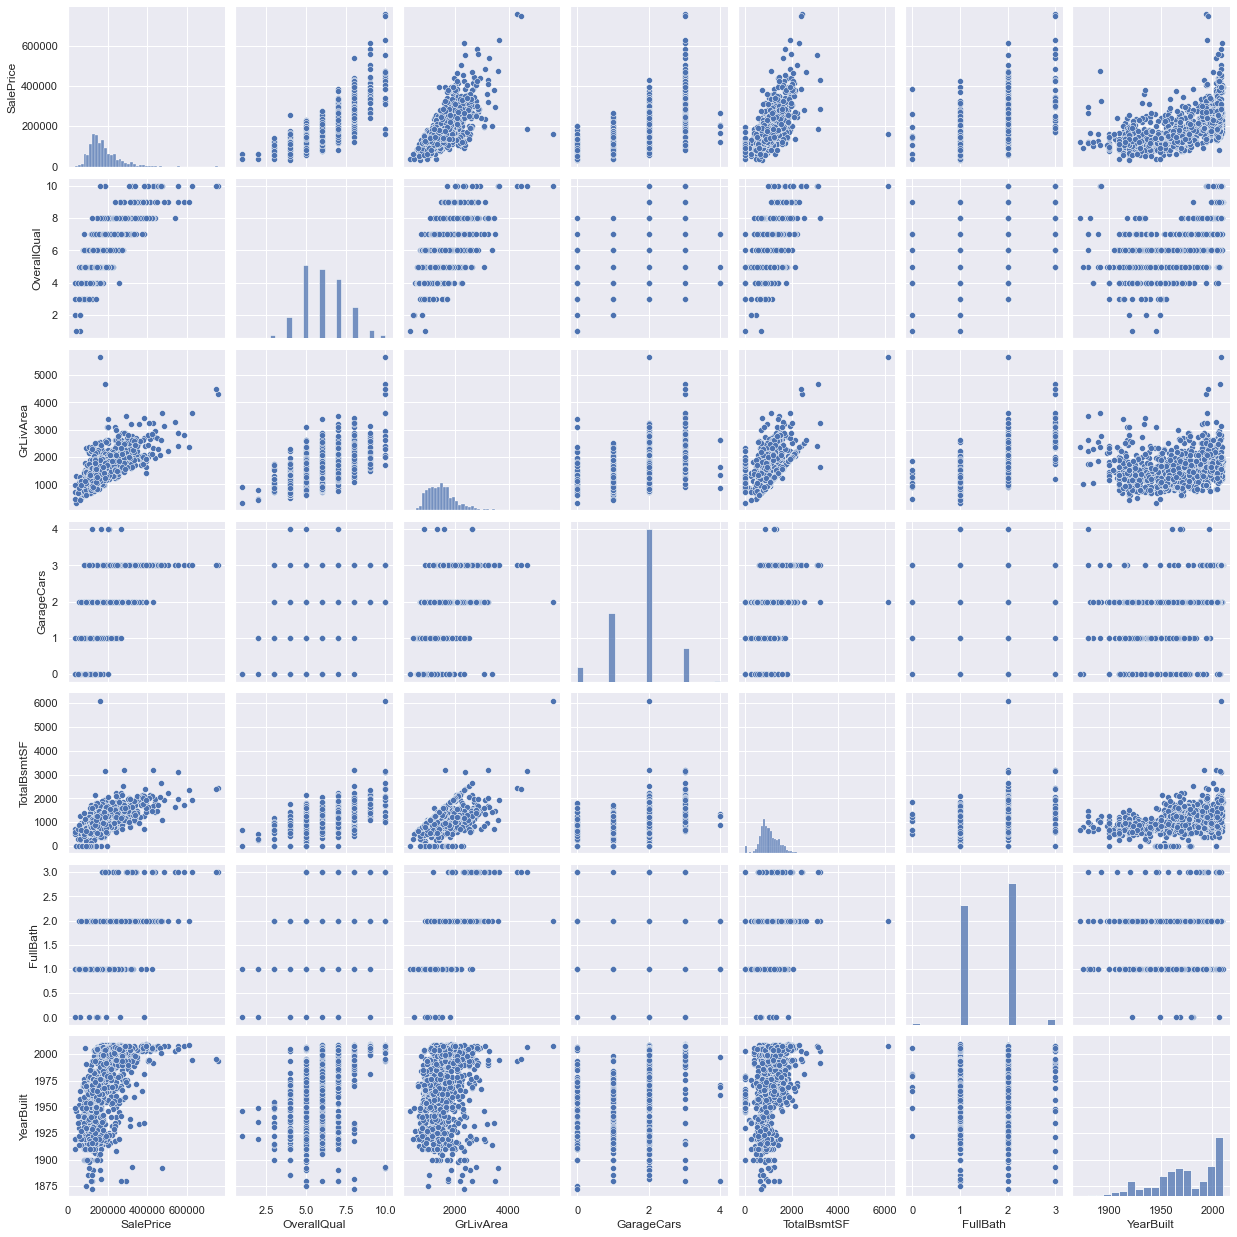

In [684]:
sns.set()
ols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[ols], size=2.5)
plt.show()

Lets deal with missing values. Get statistic

In [685]:
count = df.isnull().sum().sort_values(ascending=False)
perc = (df.isnull().sum()*100 / df.isnull().count()).sort_values(ascending=False)
data = pd.concat([count, perc], axis=1, keys=["Count", "Percentage, %"])
data.head(16)

,Count,"Percentage, %"
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


Our attention should be firstly focused on Pool quality, as it is not clear in variants and almost everywhere empty. Skip it!
Next "Other features" : Shed equal to general distribution, gar 2 obviously described in car places, other is in lowprice segment and have no idea, teniss court has one value. Skip it!
Alley - no information, just skit distiribution to right. small weight, drop it!


<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

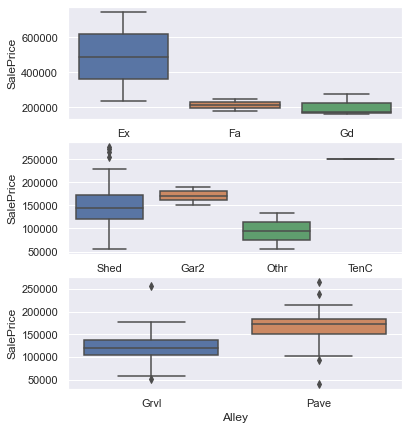

In [686]:
pltfg = plt.figure(figsize=(6, 12))
data = pd.concat([df["PoolQC"], df["SalePrice"]], axis=1)
ax1 = pltfg.add_subplot(5, 1, 1)
sns.boxplot(x=df["PoolQC"], y=df["SalePrice"], ax=ax1)
ax1 = pltfg.add_subplot(5, 1, 2)
sns.boxplot(x=df["MiscFeature"], y=df["SalePrice"], ax=ax1)
ax1 = pltfg.add_subplot(5, 1, 3)
sns.boxplot(x=df["Alley"], y=df["SalePrice"], ax=ax1)

Parameter with fence shows equal values around general mean, with just more probability for houses less than 100k$ priced. houses more than 300k$ obviously have security on high level. Skip it! 

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

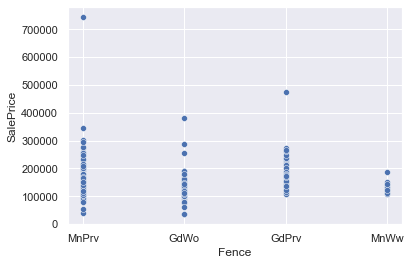

In [687]:
data = pd.concat([df["Fence"], df["SalePrice"]], axis=1)
sns.scatterplot(data=data, y="SalePrice", x="Fence")

In this case I would not skip it as fireplace seems to be parameter with small weight. Better replace NA with mean Gd.

<AxesSubplot:xlabel='SalePrice', ylabel='FireplaceQu'>

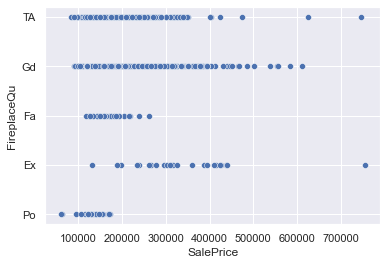

In [688]:
data = pd.concat([df["FireplaceQu"], df["SalePrice"]], axis=1)
sns.scatterplot(data=data, y="FireplaceQu", x="SalePrice")

Lot frontage in the truth should be less for high price and more for low. but here we see distribution with mean about 70 and dispertion 30. We can either change it on noraml distribution or remove at all. Skip it!

<AxesSubplot:xlabel='SalePrice', ylabel='LotFrontage'>

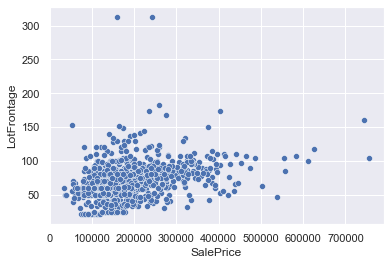

In [689]:
data = pd.concat([df["LotFrontage"], df["SalePrice"]], axis=1)
sns.scatterplot(data=data, y="LotFrontage", x="SalePrice")

Lets deal with garageX significance. create heatplot

['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'SalePrice']
['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'SalePrice']


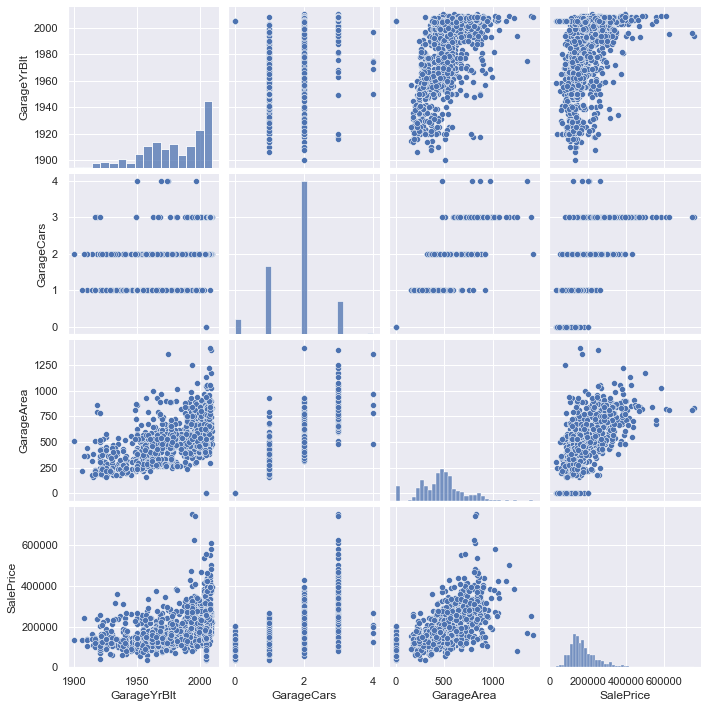

In [690]:
df2 = df
data_columns = [column for column in df2.columns if column.find("Garage") != -1]
data_columns.append("SalePrice")
for i in data_columns:
    f = df2[i].mode(dropna=True)[0]
    df2[i].fillna(f, inplace=True)

print(data_columns)
sns.pairplot(df2[data_columns], size=2.5)

data_columns = [column for column in df2.columns if column.find("Bsmt") != -1]
data_columns.append("SalePrice")
for i in data_columns:
    f = df2[i].mode(dropna=True)[0]
    df2[i].fillna(f, inplace=True)
print(data_columns)

And finnaly delete not necessary parameters

In [691]:
df = df.drop("LotFrontage", axis=1)
df = df.drop("Fence", axis=1)
df = df.drop("PoolQC", axis=1)
df = df.drop("MiscFeature", axis=1)
df = df.drop("Alley", axis=1)
df = df.drop("Id", axis=1)
df = df.drop("MasVnrArea", axis=1)
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


Lets look on distribution of non-discret parameters. We see that it is not normal, lets transform it by log.

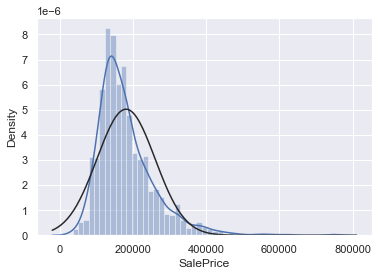

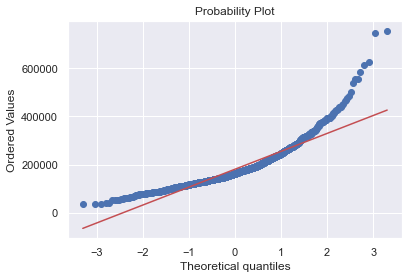

In [692]:
sns.distplot(df['SalePrice'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

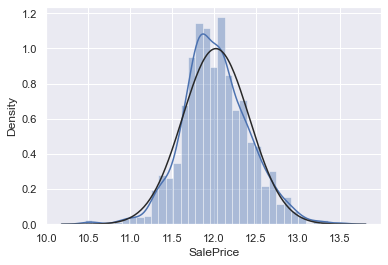

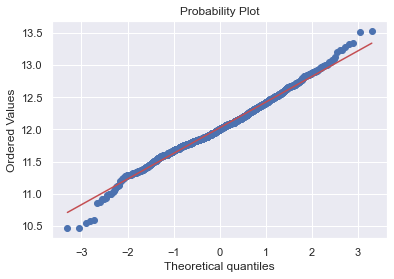

In [693]:
df["SalePrice"] = np.log(df["SalePrice"])
sns.distplot(df['SalePrice'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

And finally get dummies

In [694]:
df = pd.get_dummies(df)
print(df.columns)

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=274)


# LEARNIGN

In [695]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [696]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [697]:
model = DecisionTreeRegressor(min_samples_split=20, random_state=42, max_depth=7)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_split=20, random_state=42)

Calculate the error

<AxesSubplot:ylabel='Density'>

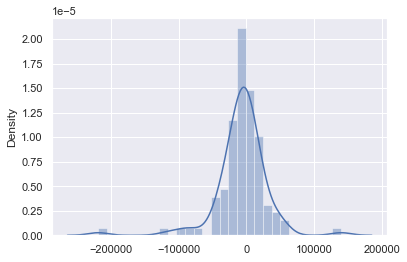

In [698]:
pred = np.round(np.exp(model.predict(X_test)), 0)
real = np.round(np.exp(y_test), 0)
err = []
for i in range(0, 100):
    err.append(pred[i] - real.values[i])
err
sns.distplot(err)

Make evaluation of accuracy of our model by MSE. Final score of the model on decision tree regressor - 79.7%

In [699]:
original_model_features = X_test.columns

In [700]:
print(f"MSE score of model is {round(model.score(X_test, y_test)*100, 2)}%")

MSE score of model is 79.7%


# ANSWER


In [712]:
input = pd.read_csv("test.csv")

In [713]:
df = input.copy()
df = df.drop("LotFrontage", axis=1)
df = df.drop("Fence", axis=1)
df = df.drop("PoolQC", axis=1)
df = df.drop("MiscFeature", axis=1)
df = df.drop("Alley", axis=1)
df = df.drop("MasVnrArea", axis=1)

data_columns = [column for column in df.columns if column.find("Garage") != -1]
for i in data_columns:
    f = df[i].mode(dropna=True)[0]
    df[i].fillna(f, inplace=True)
data_columns = [column for column in df.columns if column.find("Bsmt") != -1]
for i in data_columns:
    f = df[i].mode(dropna=True)[0]
    df[i].fillna(f, inplace=True)
df = pd.get_dummies(df)

X_id = df["Id"]
X_result = df.drop(["Id"], axis=1)


In [714]:
print(original_model_features)
print(X_result.columns)
for column in X_result.columns:
    if (column not in original_model_features):
        X_result = X_result.drop(column, axis=1)
for column in original_model_features:
    if (column not in X_result.columns):
        X_result[column]=0


Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=273)
Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=257)


In [715]:
X_result.shape

(1459, 273)

In [716]:
y_result = np.exp(model.predict(X_result))


In [722]:
output = pd.DataFrame({'Id': X_id,
                       'SalePrice': y_result})
output.to_csv('submission.csv', index=False)